In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
beml_df=pd.read_csv("BEML.csv")

In [3]:
galaxo_df=pd.read_csv("GLAXO.csv")

In [4]:
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [5]:
galaxo_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))
galaxo_df=galaxo_df.set_index(pd.DatetimeIndex(galaxo_df['Date']))

Text(0, 0.5, 'Close')

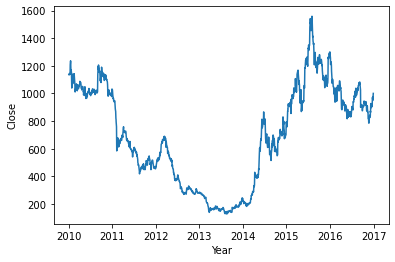

In [8]:
plt.plot(beml_df['Close']);
plt.xlabel("Year");
plt.ylabel("Close")

Text(0, 0.5, 'Close')

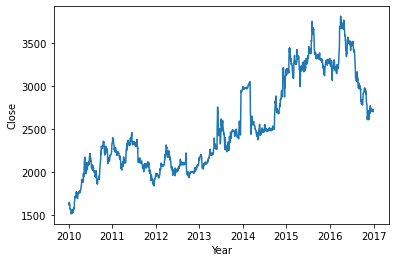

In [9]:
plt.plot(galaxo_df.Close)
plt.xlabel("Year");
plt.ylabel("Close")

In [10]:
galaxo_df['Gain']=galaxo_df.Close.pct_change(periods = 1)
beml_df['Gain']=beml_df.Close.pct_change(periods=1)

In [11]:
galaxo_df=galaxo_df.dropna()
beml_df=beml_df.dropna()

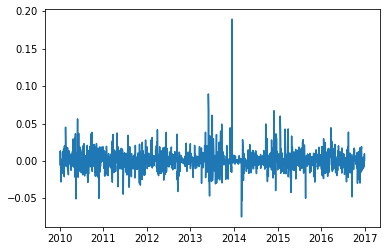

In [12]:
plt.plot(galaxo_df.Gain)

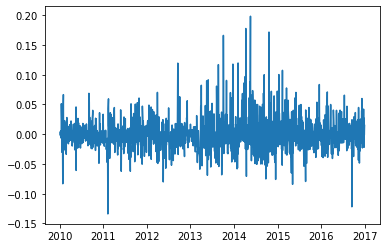

In [13]:
plt.plot(beml_df.Gain)

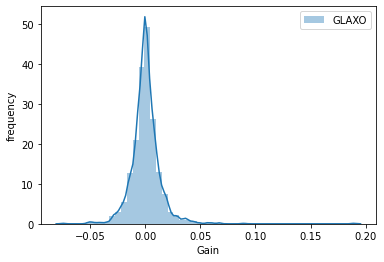

In [14]:
sns.distplot(galaxo_df.Gain, label="GLAXO")
plt.ylabel('frequency')
plt.legend()

Text(0, 0.5, 'Frequency')

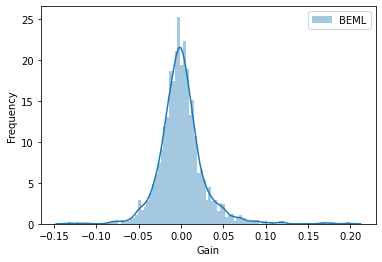

In [15]:
sns.distplot(beml_df.Gain,bins=100,label='BEML')
plt.legend()
plt.ylabel('Frequency')

In [16]:
#calculating mean and standard deviation of Galaxo
print('Mean:',round(galaxo_df.Gain.mean(),4))
print('Standard deviation:',round(galaxo_df.Gain.std(),4))

Mean: 0.0004
Standard deviation: 0.0134


In [17]:
#calculating standard deviation of beml
print('Mean:',round(beml_df.Gain.mean(),4))
print('Standard deviation:',round(beml_df.Gain.std(),4))

Mean: 0.0003
Standard deviation: 0.0264


In [18]:
#probability of getting 2% OR higher loss for GALAXO
stats.norm.cdf(-0.02,loc=round(galaxo_df.Gain.mean(),4),scale=round(galaxo_df.Gain.std(),4))

0.06395593743937553

In [19]:
#probability of getting 2% or higer gain for GALAXO
1-stats.norm.cdf(0.02,loc=round(galaxo_df.Gain.mean(),4),scale=round(galaxo_df.Gain.std(),4))

0.07177658173190637

In [20]:
#probability of getting 2% OR higher loss for BEML
stats.norm.cdf(-0.02,loc=beml_df.Gain.mean(),scale=beml_df.Gain.std())

0.22155987503755292

In [21]:
#probability of getting 2% or higer gain for BEML
1-stats.norm.cdf(0.02,loc=beml_df.Gain.mean(),scale=beml_df.Gain.std())

0.22769829484075343